# Project 1: Covid 19's Effect on the world economy & how Historical events can help better prepare for future unforeseen events
Team Members:  	Maxwell Miorada, Jay Cao, Chapman Mong and Luke Macumber

## Project Description/Outline:
To see what effect Covid 19 has had on the world economy in relation to financial markets, Country GDP’s (imports/exports), Commodities, health sector data.


In [25]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [27]:
# Set the file paths
audusd_data = Path("Data/audusd.csv")
cadusd_data = Path("Data/cadusd.csv")
chfusd_data = Path("Data/chfusd.csv")
eurusd_data = Path("Data/eurusd.csv")
gbpusd_data = Path("Data/gbpusd.csv")
usdcny_data = Path("Data/usdcny.csv")
usdjpy_data = Path("Data/usdjpy.csv")
sp500_data = Path("Data/sp500.csv")
vix_data = Path("Data/vix_history.csv")


# Read the CSVs and set the `Date` column as a datetime index to the DataFrame
audusd_df = pd.read_csv(audusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cadusd_df = pd.read_csv(cadusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
chfusd_df = pd.read_csv(chfusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
eurusd_df = pd.read_csv(eurusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
gbpusd_df = pd.read_csv(gbpusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdcny_df = pd.read_csv(usdcny_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdjpy_df = pd.read_csv(usdjpy_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_df = pd.read_csv(vix_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


# Display a few rows
audusd_df.head()

,Close
Date,
1998-12-10,0.6207
1998-12-11,0.6208
1998-12-14,0.6191
1998-12-15,0.6234
1998-12-16,0.6237


In [39]:
# Create a new pivot table where the columns are the closing prices for each pair
fx_combined_df = pd.concat([audusd_df, cadusd_df, chfusd_df, eurusd_df, gbpusd_df, usdcny_df, usdjpy_df], axis="columns", join="inner")#, sp500_df

# Sort datetime index in ascending order (past to present)
fx_combined_df.sort_index(inplace=False)

# Set column names
fx_combined_df.columns = ['AUDUSD', 'CADUSD', 'CHFUSD', 'EURUSD', 'GBPUSD', 'USDCNY', 'USDJPY']#, 'SP500']

# Display a few rows
fx_combined_df.head(10)

,AUDUSD,CADUSD,CHFUSD,EURUSD,GBPUSD,USDCNY,USDJPY
Date,,,,,,,
1998-12-10,0.6207,0.650740,0.748503,1.1833,1.6730,8.2775,117.30
1998-12-11,0.6208,0.648838,0.753012,1.1920,1.6880,8.2775,116.20
1998-12-14,0.6191,0.650393,0.753296,1.1912,1.6909,8.2775,115.63
1998-12-15,0.6234,0.648419,0.743826,1.1827,1.6832,8.2778,116.70
1998-12-16,0.6237,0.649601,0.739098,1.1713,1.6673,8.2775,116.60
1998-12-17,0.6201,0.649929,0.741400,1.1777,1.6741,8.2777,116.20
1998-12-18,0.6191,0.648431,0.742115,1.1807,1.6791,8.2777,115.70
1998-12-21,0.6153,0.646081,0.735781,1.1747,1.6840,8.2779,115.70
1998-12-22,0.6123,0.645374,0.733407,1.1742,1.6795,8.2782,116.56


[]

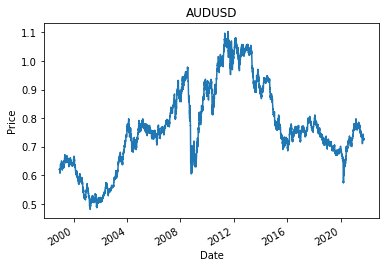

In [45]:
#fx_combined_df.plot(),
fx_plot = fx_combined_df["AUDUSD"].plot(xlabel="Date", ylabel="Price", title="AUDUSD")
fx_plot.plot()

In [29]:
# Use the `pct_change` function to calculate daily changes
fx_daily_change = fx_combined_df.pct_change()
fx_daily_change.head()

,AUDUSD,CADUSD,CHFUSD,EURUSD,GBPUSD,USDCNY,USDJPY,SP500
Date,,,,,,,,
1998-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-12-11,0.000161,-0.002923,0.006024,0.007352,0.008966,0.000000,-0.009378,0.001236
1998-12-14,-0.002738,0.002397,0.000377,-0.000671,0.001718,0.000000,-0.004905,-0.021655
1998-12-15,0.006946,-0.003035,-0.012571,-0.007136,-0.004554,0.000036,0.009254,0.018954
1998-12-16,0.000481,0.001823,-0.006356,-0.009639,-0.009446,-0.000036,-0.000857,-0.000740


In [30]:
# Correlation
#  Use the `corr` function to calculate the correlation between changes in currency
fx_correlation = fx_daily_change.corr()
fx_correlation

,AUDUSD,CADUSD,CHFUSD,EURUSD,GBPUSD,USDCNY,USDJPY,SP500
AUDUSD,1.000000,0.585308,0.349808,0.531458,0.505432,-0.039583,-0.037907,0.423077
CADUSD,0.585308,1.000000,0.272555,0.402542,0.411321,-0.053114,0.003915,0.390010
CHFUSD,0.349808,0.272555,1.000000,0.735763,0.456976,-0.020248,-0.339503,-0.066132
EURUSD,0.531458,0.402542,0.735763,1.000000,0.604970,-0.038197,-0.267270,0.088281
GBPUSD,0.505432,0.411321,0.456976,0.604970,1.000000,-0.026634,-0.135002,0.170150
USDCNY,-0.039583,-0.053114,-0.020248,-0.038197,-0.026634,1.000000,0.040098,-0.014852
USDJPY,-0.037907,0.003915,-0.339503,-0.267270,-0.135002,0.040098,1.000000,0.293229
SP500,0.423077,0.390010,-0.066132,0.088281,0.170150,-0.014852,0.293229,1.000000


<AxesSubplot:>

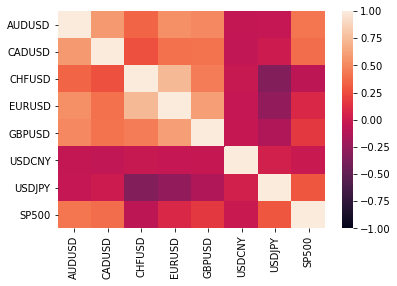

In [31]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(fx_correlation, vmin=-1, vmax=1)

In [46]:
# Slice DataFrame into recent crisis points
# Slice DataFrame into approximate start of covid19
daily_change_covid = fx_daily_change.loc['2019-12-1':'2021-09-29']
daily_change_covid

# Slice DataFrame into GFC timeframe
daily_change_gfc = fx_daily_change.loc['2007-06-1':'2009-06-1']
daily_change_gfc

# Slice DataFrame into Dot Com timeframe
daily_change_dotcom = fx_daily_change.loc['2000-1-1':'2002-12-30']
daily_change_dotcom

# Slice DataFrame into 10 year timeframe
#daily_return_10_year = fx_daily_changes.loc['2009-04-29':'2019-04-29']
#daily_return_10_year

,AUDUSD,CADUSD,CHFUSD,EURUSD,GBPUSD,USDCNY,USDJPY,SP500
Date,,,,,,,,
2000-01-03,0.005658,0.006480,0.017106,0.018904,0.012632,0.000036,-0.004795,-0.009583
2000-01-04,-0.004410,-0.000668,0.006230,0.004101,0.001040,0.000012,0.014259,-0.038312
2000-01-05,0.004124,-0.002636,0.002576,0.003987,0.002749,-0.000012,0.009211,0.001922
2000-01-06,-0.005932,-0.002397,0.000515,-0.000484,0.003289,-0.014469,0.010952,0.000956
2000-01-07,0.002295,-0.004239,-0.007989,-0.002229,-0.005100,0.000000,0.000950,0.027090
...,...,...,...,...,...,...,...,...
2002-12-23,-0.003726,-0.001319,0.004228,-0.000682,-0.005803,0.000000,0.000249,0.001809
2002-12-24,0.003562,0.002978,0.007956,0.004389,0.000439,0.000000,-0.001080,-0.005471
2002-12-26,0.000000,-0.006866,0.004137,0.006603,0.003889,0.000000,-0.001913,-0.003149


(<AxesSubplot:xlabel='Date'>,)

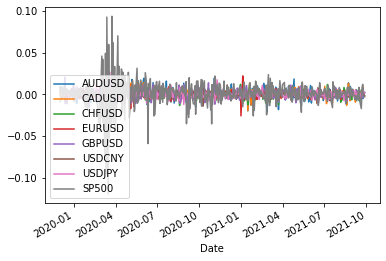

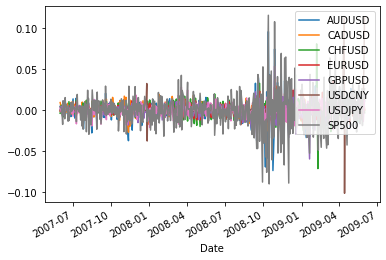

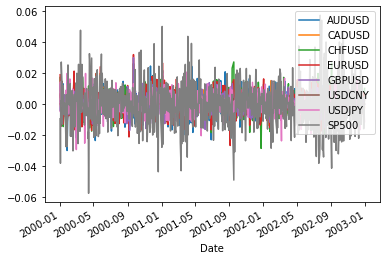

In [47]:
# Display chart of Covid19 daily changes
daily_change_covid.plot(),
daily_change_gfc.plot(),
daily_change_dotcom.plot(),

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units_df = (
    sfo_data[["housing_units"]]
    .groupby('year')
    .mean()
    .sort_values("year")
)
housing_units_df

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [5]:
# Save the dataframe as a csv file
housing_units_df.to_csv('housing_units_df.csv')

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
housing_units_df.hvplot.bar(xlabel="Year", ylabel="Housing Units", title="San Francisco Average Housing Units", ylim=(370000, 390000), yformatter='%.0f')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
average_housing_cost = (
    sfo_data[["sale_price_sqr_foot", "gross_rent"]]
    .groupby("year")
    .mean()
    )
average_housing_cost

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [41]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sale_price_sqr_foot_plot = average_housing_cost["sale_price_sqr_foot"].hvplot(xlabel="Year", ylabel="Price Per Sq Foot", title="San Francisco Average Sale Price Per Sq Foot")
sale_price_sqr_foot_plot.plot()

NameError: name 'average_housing_cost' is not defined

[]

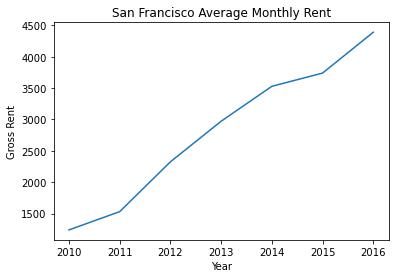

In [9]:

# Line chart for average montly rent
gross_rent_plot = average_housing_cost["gross_rent"].plot(xlabel="Year", ylabel="Gross Rent", title="San Francisco Average Monthly Rent")
gross_rent_plot.plot()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [10]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = (
    sfo_data.groupby(["year","neighborhood"])
    .mean()
    )
neighborhood_df.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [11]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot.line(x="year", y="sale_price_sqr_foot", xlabel="Year", ylabel="Average Sale Price Per Sq Foot", groupby="neighborhood")



BokehModel(combine_events=True, render_bundle={'docs_json': {'5e83eff2-85e3-4cdd-9d92-468df6063b6b': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [12]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot.line(x="year", y="gross_rent", xlabel="Year", ylabel="Average Monthly Rent", groupby="neighborhood")

BokehModel(combine_events=True, render_bundle={'docs_json': {'1064e75b-c664-4315-ab84-bf7cb0b0b4be': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [13]:
# Getting the data from the top 10 expensive neighborhoods to own
mean_of_neighborhood = (
    neighborhood_df.groupby(["neighborhood"])
    .mean()
    .round(2)
    )
#mean_of_neighborhood.head()
most_expensive_neighborhoods = mean_of_neighborhood.sort_values("sale_price_sqr_foot", ascending= False).head(10)
most_expensive_neighborhoods.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.99,377427.50,2555.17
Merced Heights,788.84,380348.00,3414.00
Miraloma Park,779.81,375967.25,2155.25
Pacific Heights,689.56,378401.00,2817.29
Westwood Park,687.09,382295.00,3959.00


In [14]:
# Plotting the data from the top 10 expensive neighborhoods
most_expensive_neighborhoods.hvplot.bar(
    x="neighborhood", y="sale_price_sqr_foot",
    xlabel="Neighborhood", ylabel="Avg. Sale Price Per Square Foot",
    title="Top 10 Expensive Neighborhoods in SFO",
    yformatter='%.0f', rot=90, color='red')

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [15]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
purchase_v_rental = (
    neighborhood_df.groupby(["year","neighborhood"])
    .mean()
    .round(2)
    )


purchase_v_rental.sort_values("sale_price_sqr_foot", ascending= False).head(10)
purchase_v_rental


sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                         291.18         372560        1239
     Anza Vista                           267.93         372560        1239
     Bayview                              170.10         372560        1239
     Buena Vista Park                     347.39         372560        1239
     Central Richmond                     319.03         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                       903.05         384242        4390
     Twin Peaks                           970.09         384242        4390
     Van Ness/ Civic Center               552.60         384242        4390
     Visitacion Valley                    328.32         384242        4390
     Westwood Park                        631.20         384242        4390

[397 rows x 3 columns]

In [16]:
# Plotting the data from the top 10 expensive neighborhoods
purchase_v_rental.hvplot.bar("year",["gross_rent", "sale_price_sqr_foot"], xlabel="Neighborhood", ylabel="Dollars",
    title="Top 10 Expensive Neighborhoods in SFO",rot=90, groupby="neighborhood")
 

BokehModel(combine_events=True, render_bundle={'docs_json': {'8ed18ae0-2be4-4e20-a568-3f15c236c3ba': {'defs': …

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [17]:
# Load neighborhoods coordinates data
#Read the Mapbox API key
#load_dotenv()
#map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_coordinates_df = pd.read_csv(file_path)
neighborhood_coordinates_df.head()


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [18]:
# Calculate the mean values for each neighborhood
mean_of_neighborhood = mean_of_neighborhood.reset_index().rename(columns = {'neighborhood':'Neighborhood'})
mean_of_neighborhood.head()

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.02,378401.0,2817.29
1,Anza Vista,373.38,379050.0,3031.83
2,Bayview,204.59,376454.0,2318.40
3,Bayview Heights,590.79,382295.0,3739.00
4,Bernal Heights,576.75,379374.5,3080.33


In [19]:
# Join the average values with the neighborhood locations
neighborhood_av_values = pd.merge(neighborhood_coordinates_df, mean_of_neighborhood, on='Neighborhood')
#neighborhood_av_values = pd.concat([neighborhood_coordinates_df, mean_of_neighborhood], axis=1)
#neighborhood_coordinates_df.join ( neighborhood_av_values.set_index( [ 'Neighborhood' ], verify_integrity=True ), on=[ 'neighborhood' ], how='left' )
neighborhood_av_values.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.02,378401.0,2817.29
1,Anza Vista,37.779598,-122.443451,373.38,379050.0,3031.83
2,Bayview,37.734670,-122.401060,204.59,376454.0,2318.40
3,Bayview Heights,37.728740,-122.410980,590.79,382295.0,3739.00
4,Buena Vista Park,37.768160,-122.439330,452.68,378076.5,2698.83


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

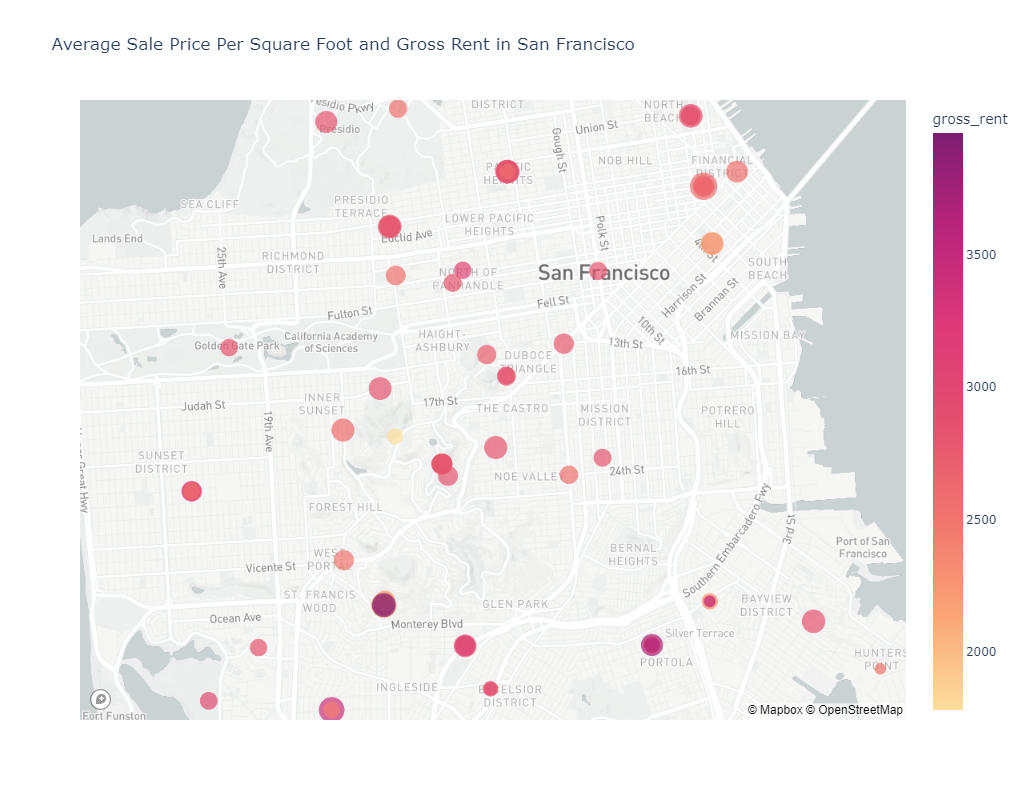

In [20]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
neighborhood_info_plot = px.scatter_mapbox(
    neighborhood_av_values,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.sequential.Sunsetdark,
    title="Average Sale Price Per Square Foot and Gross Rent in San Francisco",
    hover_name="Neighborhood",
    zoom=12,
    width=1000, height=800
    
    
)
neighborhood_info_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [21]:
# Fetch the data from all expensive neighborhoods per year.
expensive_neighborhoods_per_year_df = sfo_data.sort_values("sale_price_sqr_foot",  ascending= False).reset_index().round(2).head(10)
expensive_neighborhoods_per_year_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2015,Union Square District,2258.70,382295,3739
1,2016,Presidio Heights,1465.97,384242,4390
2,2016,Merced Heights,1416.67,384242,4390
3,2013,Union Square District,1290.47,378401,2971
4,2014,Miraloma Park,1267.77,380348,3528
5,2016,Parnassus/Ashbury Heights,1208.00,384242,4390
6,2016,Outer Richmond,1196.65,384242,4390
7,2015,Marina,1132.84,382295,3739
8,2014,South of Market,1119.84,380348,3528
9,2015,Corona Heights,1100.79,382295,3739


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


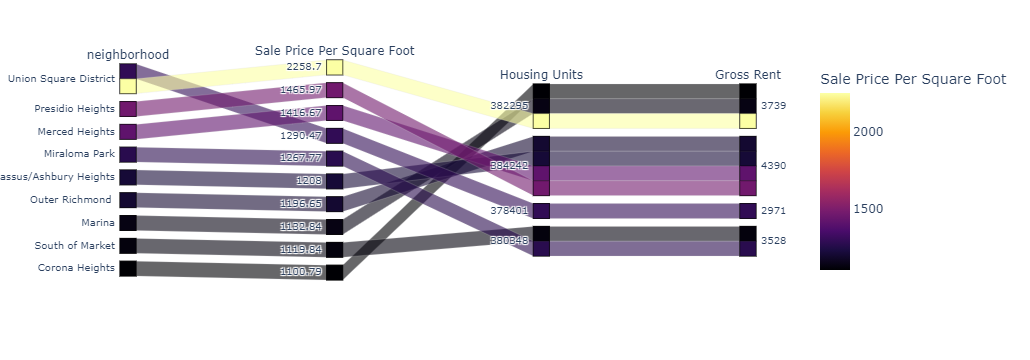

In [22]:
# Parallel Categories Plot
most_expensive_para_cat_plot = px.parallel_categories(
        expensive_neighborhoods_per_year_df,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
        labels={
            "sale_price_sqr_foot": "Sale Price Per Square Foot",
            "housing_units": "Housing Units",
            "gross_rent": "Gross Rent",
            },
        width=1200,
    )
most_expensive_para_cat_plot.show()


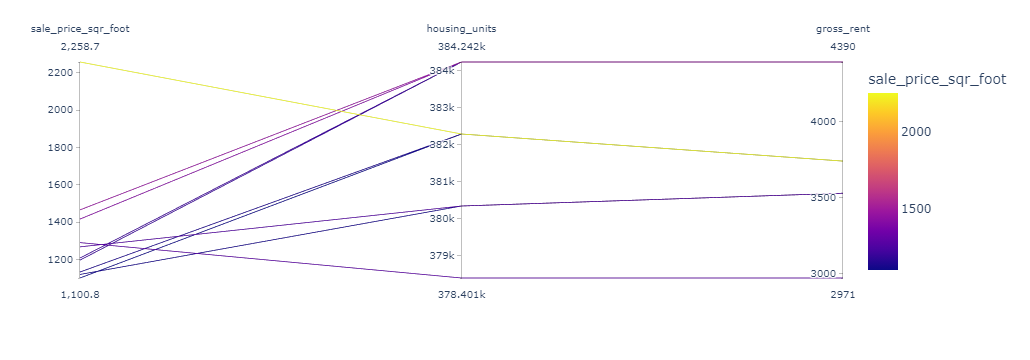

In [23]:
# Parallel Coordinates Plot
px.parallel_coordinates(expensive_neighborhoods_per_year_df, color='sale_price_sqr_foot', 
    dimensions=["sale_price_sqr_foot", "housing_units", "gross_rent"])

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

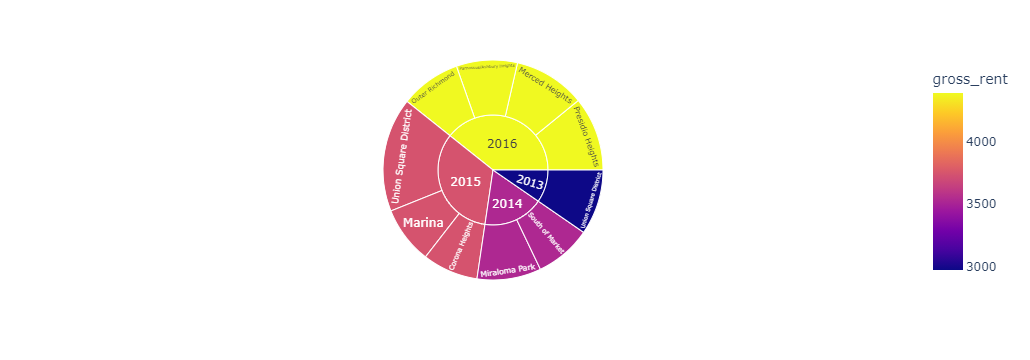

In [24]:
# Sunburst Plot
sunburst_plot_df = sfo_data.sort_values("sale_price_sqr_foot",  ascending= False).reset_index().round(2).head(10)
fig = px.sunburst(sunburst_plot_df, path=['year', 'neighborhood'], values='sale_price_sqr_foot',
    color= 'gross_rent')
fig.show()